In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [6]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(titanic_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(titanic_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


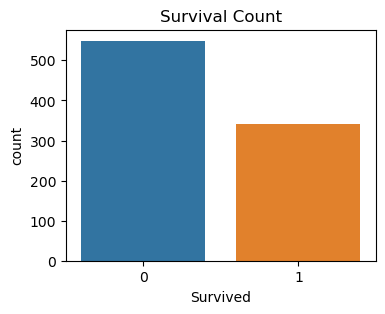

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

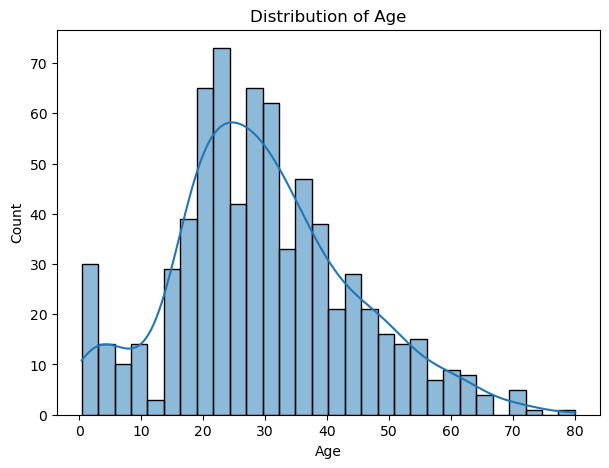

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

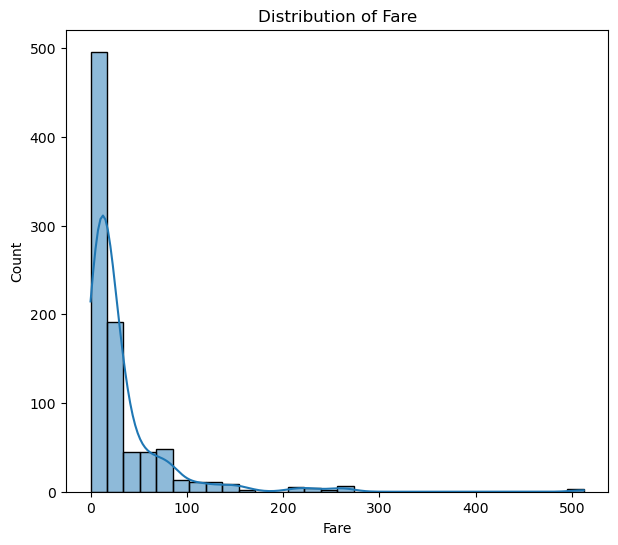

In [17]:
plt.figure(figsize=(7, 6))
sns.histplot(titanic_data['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

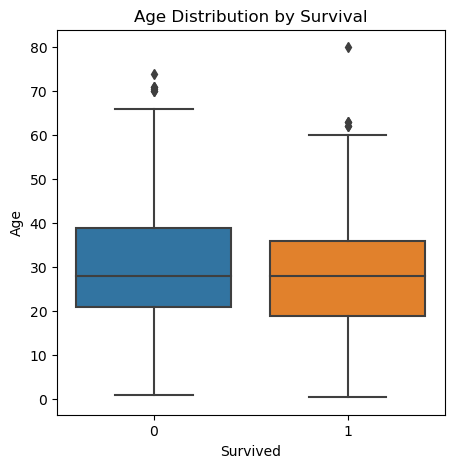

In [45]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.show()

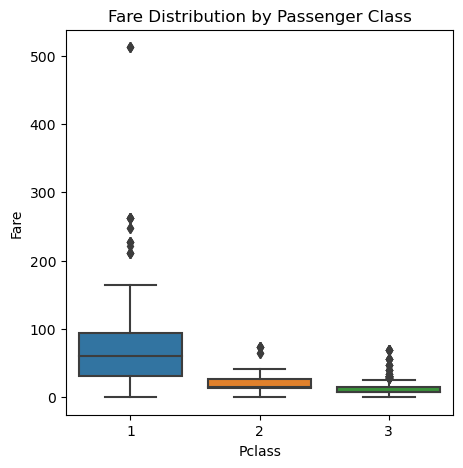

In [48]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [26]:
titanic_data['Name'] = pd.to_numeric(titanic_data['Name'], errors='coerce')

In [28]:
titanic_data['Ticket'] = pd.to_numeric(titanic_data['Ticket'], errors='coerce')

In [35]:
titanic_data['Embarked'] = pd.to_numeric(titanic_data['Embarked'], errors='coerce')


In [ ]:
titanic_data['Name'].fillna(titanic_data['Name'].median(), inplace=True)

In [36]:
titanic_data['Ticket'].fillna(titanic_data['Ticket'].median(), inplace=True)

In [37]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].median(), inplace=True)

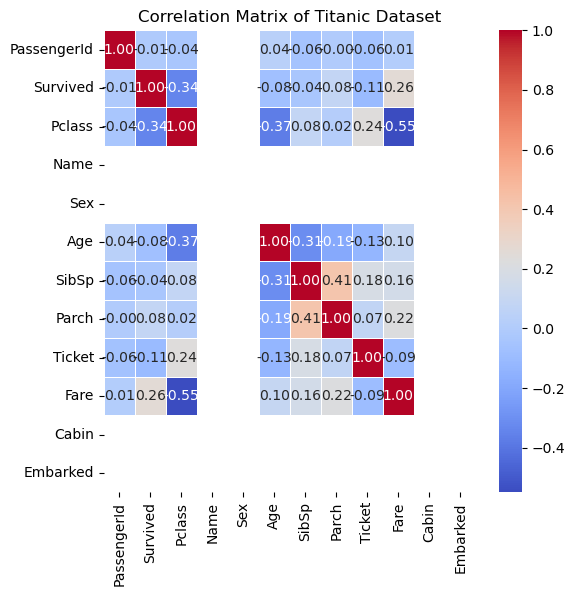

In [51]:
correlation_matrix = titanic_data.corr()


plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

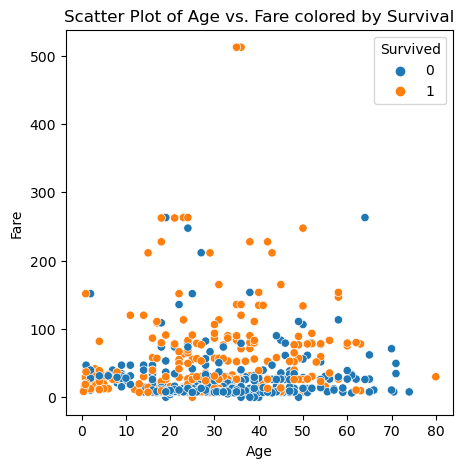

In [53]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data)
plt.title('Scatter Plot of Age vs. Fare colored by Survival')
plt.show()

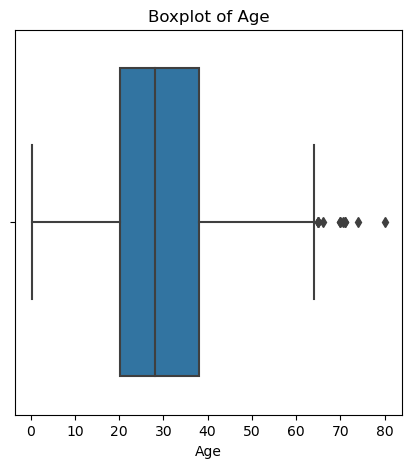

In [55]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Age', data=titanic_data)
plt.title('Boxplot of Age')
plt.show()

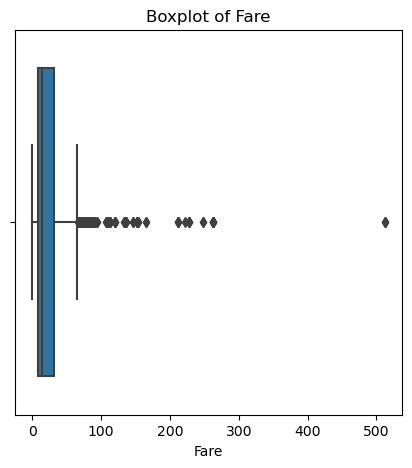

In [56]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Fare', data=titanic_data)
plt.title('Boxplot of Fare')
plt.show()

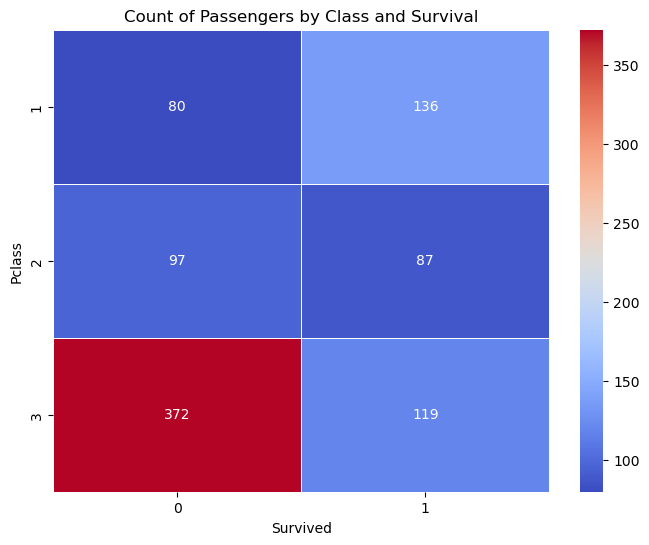

In [44]:
class_survived = pd.crosstab(index=titanic_data['Pclass'], columns=titanic_data['Survived'])

plt.figure(figsize=(8, 6))
sns.heatmap(class_survived, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title('Count of Passengers by Class and Survival')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()